In [2]:
#Part B
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt


In [9]:
#HYPOTHESIS: Percentage of large cars on the market correlates with states' median income.

carDF = pd.read_csv('Car_Detail.csv')
houseDF = pd.read_csv('House_Detail.csv')

#looking at states' yearly median income from 1990-2017
CA_income = houseDF['Median_CA'][6:34].reset_index().drop('index',axis=1)
TX_income = houseDF['Median_TX'][6:34].reset_index().drop('index',axis=1)
CO_income = houseDF['Median_CO'][6:34].reset_index().drop('index',axis=1)
NY_income = houseDF['Median_NY'][6:34].reset_index().drop('index',axis=1)
IN_income = houseDF['Median_IN'][6:34].reset_index().drop('index',axis=1)


finalDF = pd.DataFrame(columns = ["Year", '% Large Cars', 'Median_CA', 
                                 'Median_CO', 'Median_NY', 'Median_TX',
                                 'Median_IN'])

#calculating percentage of large cars on the market each year
temp = carDF.groupby(['Year', 'Vehicle Size']).size().rename('count').reset_index()

large_cars_year = []
for i in range(1990,2018):
    curr_year = i
    
    sub_data = temp[temp['Year'] == curr_year]
    large_cars = int(sub_data[sub_data['Vehicle Size'] == 'Large']['count'])
    total_cars = sum(sub_data['count'])
    percent_large = large_cars/total_cars
    large_cars_year.append(large_cars/total_cars)

finalDF['Year'] = range(1990,2018)
finalDF['Median_CA'] = CA_income
finalDF['Median_CO'] = CO_income
finalDF['Median_NY'] = NY_income
finalDF['Median_TX'] = TX_income
finalDF['Median_IN'] = IN_income
finalDF['% Large Cars'] = large_cars_year

finalDF.head(5)

,Year,% Large Cars,Median_CA,Median_CO,Median_NY,Median_TX,Median_IN
0,1990,0.211382,33290,57428,49864,52747,50318
1,1991,0.309211,33664,56793,49136,50003,48842
2,1992,0.192090,34903,57148,48114,49177,50192
3,1993,0.153110,34073,59182,48992,49296,50579
4,1994,0.122699,35331,63594,49241,51696,46827


Correlation between CA median income and % large cars is: 0.03902231250348974
Correlation between CO median income and % large cars is: 0.24808639796514714
Correlation between NY median income and % large cars is: 0.2638539326259151
Correlation between TX median income and % large cars is: 0.17136212675596008
Correlation between IN median income and % large cars is: 0.40816399318840113


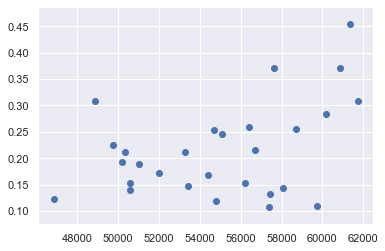

In [10]:
ca_corr = finalDF['Median_CA'].corr(finalDF['% Large Cars'])
co_corr = finalDF['Median_CO'].corr(finalDF['% Large Cars'])
ny_corr = finalDF['Median_NY'].corr(finalDF['% Large Cars'])
tx_corr = finalDF['Median_TX'].corr(finalDF['% Large Cars'])
in_corr = finalDF['Median_IN'].corr(finalDF['% Large Cars'])

print('Correlation between CA median income and % large cars is: ' + str(ca_corr))
print('Correlation between CO median income and % large cars is: ' + str(co_corr))
print('Correlation between NY median income and % large cars is: ' + str(ny_corr))
print('Correlation between TX median income and % large cars is: ' + str(tx_corr))
print('Correlation between IN median income and % large cars is: ' + str(in_corr))

plt.scatter(finalDF['Median_IN'], finalDF['% Large Cars'])

0.40816399318840113


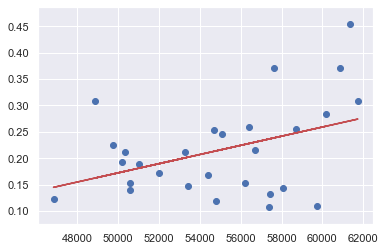

In [8]:
from sklearn import datasets, linear_model
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

slope, intercept, r_value, p_value, std_error = stats.linregress(finalDF['Median_IN'],finalDF['% Large Cars'])
print(r_value)
plt.scatter(finalDF['Median_IN'], finalDF['% Large Cars'])
plt.plot(finalDF['Median_IN'], intercept + slope*finalDF['Median_IN'], 'r', label='fitted line')


#CONCLUSION
#The percentage of large cars on the market in a given year correlates most with the yearly median income in Indiana. 
#There appears to be almost no correlation, 0.039, between % of large cars and median income 
#in California; however, the correlation for the rest of the states are all weak-positive ones.